In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('salaries.csv')

In [3]:
df.shape

(13972, 11)

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


### 1. You're a Compensation analyst employed by a multinational corporation. Your Assignment is to Pinpoint Countries who give work fully remotely, for the title 'managers’ Paying salaries Exceeding $90,000 USD.

In [6]:
mask = (df['remote_ratio'] == 100) & (df['salary_in_usd'] > 90000) & (df['job_title'].str.contains('Manager'))

country_list = list(df[mask]['company_location'].unique())
country_list

['US', 'MX', 'AU', 'FR']

### 2. As a remote work advocate working for a progressive HR tech startup who place their freshers’ clients in large tech firms. You're tasked with identifying top 5 countries having greatest count of large (company size) number of companies.

In [8]:
mask = (df['company_size'] == 'L') & (df['experience_level'] == 'EN')

df[mask]['company_location'].value_counts().sort_values(ascending = False).head().reset_index().rename(
                            columns = {'index': 'Country', 'company_location': 'Total large company'})

,Country,Total large company
0,US,53
1,CA,10
2,DE,10
3,GB,8
4,IN,6


### 3. Picture yourself as a data scientist working for a workforce management platform. Your objective is to calculate the percentage of employees. Who enjoy fully remote roles with salaries Exceeding $100,000 USD, Shedding light on the attractiveness of high-paying remote positions in today's job market.

In [12]:
mask1 = df['remote_ratio'] == 100
mask2 = df['salary_in_usd'] > 100000

ans = len(df[mask1 & mask2]) / len(df[mask2]) * 100
print(f'Percentage = {ans: .2f}%')

Percentage =  32.24%


### 4. As a market researcher, your job is to investigate the job market for a company that analyzes workforce data. Your task is to know how many people were employed in different types of companies as per their size in 2021.

In [42]:
ans = df[df['work_year'] == 2021]['company_size'].value_counts()
ans = ans.reset_index().rename(columns = {'index': 'Company Size', 'company_size': 'Total Employee'})
ans

,Company Size,Total Employee
0,L,124
1,M,52
2,S,42


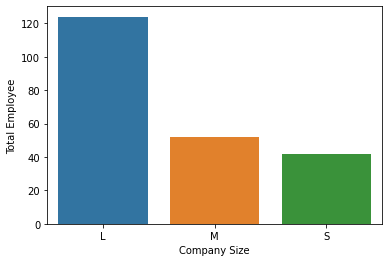

In [51]:
sns.barplot(data = ans, x = 'Company Size', y = 'Total Employee')
plt.show()

### 5. Imagine you're a data analyst working for a global recruitment agency. Your task is to identify the locations where entry-level average salaries exceed the average salary for that job title in market for entry level, helping your agency guide  candidates towards lucrative opportunities.

In [26]:
mask = df['experience_level'] == 'EN'

avg_salary_per_jobtitleANDlocation = df[mask].groupby(['job_title',  'company_location'])['salary_in_usd'].mean().reset_index()
avg_salary_per_jobtitleANDlocation

# data1 = df[mask].groupby(['company_location', 'job_title'])['salary_in_usd'].mean().reset_index()
# data2 = df[mask].groupby('job_title')['salary_in_usd'].mean().reset_index()

,job_title,company_location,salary_in_usd
0,AI Developer,BA,120000.000000
1,AI Developer,DE,140358.500000
2,AI Developer,SE,80000.000000
3,AI Developer,UA,50000.000000
4,AI Developer,US,130000.000000
...,...,...,...
174,Research Scientist,CN,100000.000000
175,Research Scientist,GB,82528.000000
176,Research Scientist,NL,42000.000000
177,Research Scientist,US,168206.923077


In [28]:
avg_salary_per_jobtitle = df[mask].groupby('job_title')['salary_in_usd'].mean().reset_index()
avg_salary_per_jobtitle

,job_title,salary_in_usd
0,AI Developer,110119.500000
1,AI Engineer,33679.000000
2,AI Programmer,56858.800000
3,AI Research Engineer,28734.000000
4,AI Research Scientist,88888.000000
...,...,...
59,Quantitative Research Analyst,51000.000000
60,Research Analyst,107294.214286
61,Research Engineer,135467.724138
62,Research Scientist,158548.551724


In [37]:
new_df = pd.merge(avg_salary_per_jobtitleANDlocation, avg_salary_per_jobtitle, on = 'job_title')
new_df.rename(columns = {'salary_in_usd_x': 'avg_salary_per_jobtitleANDlocation', 'salary_in_usd_y': 'avg_salary_per_jobtitle'}, inplace = True)
new_df

,job_title,company_location,avg_salary_per_jobtitleANDlocation,avg_salary_per_jobtitle
0,AI Developer,BA,120000.000000,110119.500000
1,AI Developer,DE,140358.500000,110119.500000
2,AI Developer,SE,80000.000000,110119.500000
3,AI Developer,UA,50000.000000,110119.500000
4,AI Developer,US,130000.000000,110119.500000
...,...,...,...,...
174,Research Scientist,CN,100000.000000,158548.551724
175,Research Scientist,GB,82528.000000,158548.551724
176,Research Scientist,NL,42000.000000,158548.551724
177,Research Scientist,US,168206.923077,158548.551724


In [41]:
# Final answer

new_df[new_df['avg_salary_per_jobtitleANDlocation'] > new_df['avg_salary_per_jobtitle']]

,job_title,company_location,avg_salary_per_jobtitleANDlocation,avg_salary_per_jobtitle
0,AI Developer,BA,120000.000000,110119.500000
1,AI Developer,DE,140358.500000,110119.500000
4,AI Developer,US,130000.000000,110119.500000
5,AI Engineer,DE,35000.000000,33679.000000
6,AI Engineer,IT,44444.000000,33679.000000
9,AI Programmer,CA,74087.000000,56858.800000
10,AI Programmer,IN,60207.000000,56858.800000
13,AI Research Engineer,GB,36940.000000,28734.000000
17,AI Scientist,CA,200000.000000,60911.500000
25,Analytics Engineer,US,110831.250000,96722.300000


### 6. You've been hired by a big HR Consultancy to look at how much people get paid in different Countries. Your job is to Find out for each job title which Country pays the maximum average salary. This helps you to place your candidates in those countries.

## Solution - 1

In [23]:
new_df = df.copy()

In [28]:
tab1 = new_df.groupby(['company_location', 'job_title'])['salary_in_usd'].mean().reset_index().rename(columns = {'salary_in_usd': 'avg_salary'})
tab1

,company_location,job_title,avg_salary
0,AD,Data Scientist,50745.000000
1,AE,AI Engineer,90000.000000
2,AE,Lead Data Scientist,115000.000000
3,AE,Machine Learning Engineer,92500.000000
4,AM,Machine Learning Engineer,50000.000000
...,...,...,...
559,ZA,Data Architect,47286.500000
560,ZA,Data Engineer,100492.500000
561,ZA,Data Manager,33575.000000
562,ZA,Machine Learning Software Engineer,34482.000000


In [32]:
tab2 = tab1.groupby('job_title')['avg_salary'].max().reset_index().rename(columns = {'avg_salary': 'max_avg_salary'})
tab2

,job_title,max_avg_salary
0,AI Architect,800000.0
1,AI Developer,275000.0
2,AI Engineer,300000.0
3,AI Product Manager,152650.0
4,AI Programmer,120000.0
...,...,...
141,Sales Data Analyst,60000.0
142,Software Data Engineer,210000.0
143,Staff Data Analyst,179998.0
144,Staff Data Scientist,134500.0


In [34]:
data = pd.merge(tab1, tab2, on = 'job_title')
data

,company_location,job_title,avg_salary,max_avg_salary
0,AD,Data Scientist,50745.000000,164951.5
1,AT,Data Scientist,76352.000000,164951.5
2,AU,Data Scientist,121838.666667,164951.5
3,BE,Data Scientist,68030.500000,164951.5
4,BR,Data Scientist,52636.666667,164951.5
...,...,...,...,...
559,US,Quantitative Research Analyst,51000.000000,51000.0
560,US,Robotics Engineer,118750.000000,118750.0
561,US,Robotics Software Engineer,196625.000000,196625.0
562,US,Staff Data Scientist,134500.000000,134500.0


In [41]:
# Final answer

data[data['avg_salary'] == data['max_avg_salary']][['job_title', 'company_location']].set_index('job_title')

,company_location
job_title,
Data Scientist,NZ
AI Engineer,QA
Lead Data Scientist,US
Machine Learning Engineer,UA
Data Analyst,MX
...,...
Quantitative Research Analyst,US
Robotics Engineer,US
Robotics Software Engineer,US


## Solution - 2

In [46]:
new_df = df.copy()

grouped = new_df.groupby(['company_location', 'job_title'])['salary_in_usd'].mean().reset_index().rename(columns = {'salary_in_usd': 'avg_salary'})
grouped

,company_location,job_title,avg_salary
0,AD,Data Scientist,50745.000000
1,AE,AI Engineer,90000.000000
2,AE,Lead Data Scientist,115000.000000
3,AE,Machine Learning Engineer,92500.000000
4,AM,Machine Learning Engineer,50000.000000
...,...,...,...
559,ZA,Data Architect,47286.500000
560,ZA,Data Engineer,100492.500000
561,ZA,Data Manager,33575.000000
562,ZA,Machine Learning Software Engineer,34482.000000


In [51]:
grouped['rank'] = grouped.groupby('job_title')['avg_salary'].rank(method = 'dense', ascending = False)
grouped

,company_location,job_title,avg_salary,rank
0,AD,Data Scientist,50745.000000,25.0
1,AE,AI Engineer,90000.000000,5.0
2,AE,Lead Data Scientist,115000.000000,3.0
3,AE,Machine Learning Engineer,92500.000000,13.0
4,AM,Machine Learning Engineer,50000.000000,27.0
...,...,...,...,...
559,ZA,Data Architect,47286.500000,6.0
560,ZA,Data Engineer,100492.500000,6.0
561,ZA,Data Manager,33575.000000,7.0
562,ZA,Machine Learning Software Engineer,34482.000000,3.0


In [55]:
# Final answer

grouped[grouped['rank'] == 1][['job_title', 'company_location']].set_index('job_title')

,company_location
job_title,
Computer Vision Software Engineer,AU
ML Engineer,AU
AI Architect,CA
AI Developer,CA
Big Data Engineer,CA
...,...
Robotics Engineer,US
Robotics Software Engineer,US
Software Data Engineer,US


### 7. As a data-driven business consultant, you've been hired by a multinational corporation to analyze salary trends across different company locations. Your goal is to pinpoint locations where the average salary has consistently increased over the past few years (countries where data is available for 3 years only. Present year and past two years) providing insights into locations experiencing sustained salary growth.

## Solution - 1

In [6]:
data = df.pivot_table(index = 'company_location', columns = 'work_year', values = 'salary_in_usd', aggfunc = 'mean')

In [7]:
data

work_year,2020,2021,2022,2023,2024
company_location,,,,,
AD,NaN,NaN,NaN,50745.000000,NaN
AE,115000.000000,NaN,92500.000000,NaN,90000.000000
AM,NaN,NaN,NaN,50000.000000,NaN
AR,NaN,NaN,50000.000000,65000.000000,88500.000000
AS,NaN,18053.000000,50000.000000,NaN,27000.000000
...,...,...,...,...,...
TR,NaN,24093.500000,25000.000000,19190.500000,27000.000000
UA,NaN,NaN,NaN,121333.333333,82000.000000
US,147167.818182,138721.505051,147559.584328,159578.623602,157808.516047


In [8]:
# Final answer

mask = (data.loc[:, 2024] > data.loc[:, 2023]) & (data.loc[:, 2023] > data.loc[:, 2022])
ans = data[mask].loc[:, [2022, 2023, 2024]]
ans

work_year,2022,2023,2024
company_location,,,
AR,50000.000000,65000.000000,88500.000000
CA,126009.552632,150724.141414,153611.807692
ES,47997.341463,60327.985714,72184.666667
FI,63040.000000,71259.000000,77777.000000
FR,72684.466667,100411.190476,101370.166667
HU,17684.000000,43000.000000,63333.000000
IN,37328.333333,47777.521739,71538.333333
PT,48921.375000,51521.000000,53054.750000


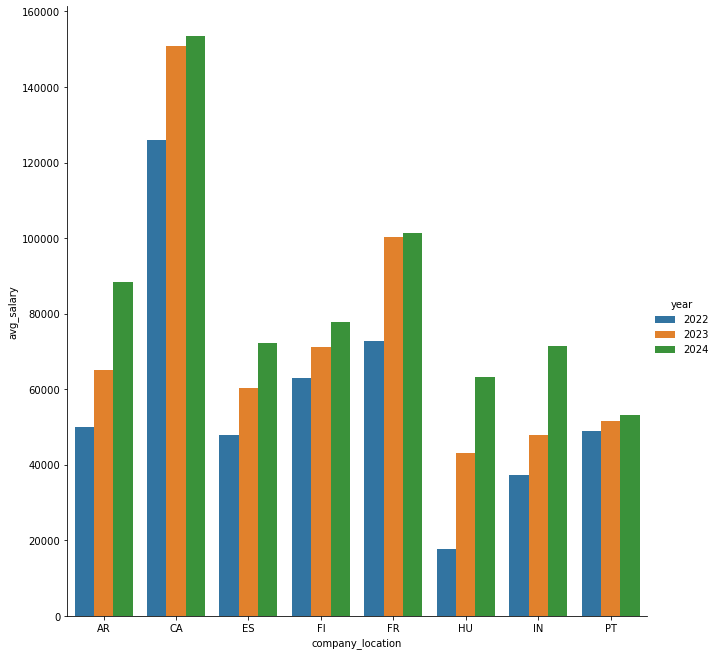

In [10]:
# Plotting

melt_ans = pd.melt(ans.reset_index(), id_vars = 'company_location', value_vars = [2022, 2023, 2024], var_name = 'year',
                  value_name = 'avg_salary')

sns.catplot(kind = 'bar', data = melt_ans, x = 'company_location', y = 'avg_salary', hue = 'year', height = 9, aspect = 1)

plt.show()

## Solution - 2

In [94]:
# Step 1: Filter the last 3 years
years = [2024, 2023, 2022]
filtered_df = df[df['work_year'].isin(years)]

# Step 2: Calculate the average salary per location per year
avg_salaries = filtered_df.groupby(['company_location', 'work_year'])['salary_in_usd'].mean().reset_index()

# Step 3: Pivot the data so each row is a company_location and columns are years
pivot_df = avg_salaries.pivot(index='company_location', columns='work_year', values='salary_in_usd')

# Step 4: Identify locations with a consistent salary increase over the last 3 years
mask = (pivot_df[2024] > pivot_df[2023]) & (pivot_df[2023] > pivot_df[2022])
consistent_increase_locations = pivot_df[mask]

# Show the result
consistent_increase_locations


work_year,2022,2023,2024
company_location,,,
AR,50000.000000,65000.000000,88500.000000
CA,126009.552632,150724.141414,153611.807692
ES,47997.341463,60327.985714,72184.666667
FI,63040.000000,71259.000000,77777.000000
FR,72684.466667,100411.190476,101370.166667
HU,17684.000000,43000.000000,63333.000000
IN,37328.333333,47777.521739,71538.333333
PT,48921.375000,51521.000000,53054.750000


### 8. Picture yourself as a workforce strategist employed by a global HR tech startup. Your mission is to determine the percentage of fully remote work for each experience level in 2021 and compare it with the corresponding figures for 2024. Highlighting any significant increases or decreases in remote work adoption over the years.

## Solution - 1

In [124]:
# For 2021

mask1 = df['work_year'] == 2021
mask2 = df['remote_ratio'] == 100

remote_count = df[mask1  & mask2].groupby('experience_level')['job_title'].count().reset_index().rename(columns = {'job_title': 'count'})
total_count = df[mask1].groupby('experience_level')['job_title'].count().reset_index().rename(columns = {'job_title': 'count'})

data_2021 = pd.merge(remote_count, total_count, on = 'experience_level')
data_2021['percentage_2021'] = (data_2021['count_x'] / data_2021['count_y'] * 100).round(2)

data_2021

,experience_level,count_x,count_y,percentage_2021
0,EN,22,46,47.83
1,EX,5,10,50.00
2,MI,45,87,51.72
3,SE,44,75,58.67


In [125]:
# For 2024

mask1 = df['work_year'] == 2024
mask2 = df['remote_ratio'] == 100

remote_count = df[mask1  & mask2].groupby('experience_level')['job_title'].count().reset_index().rename(columns = {'job_title': 'count'})
total_count = df[mask1].groupby('experience_level')['job_title'].count().reset_index().rename(columns = {'job_title': 'count'})

data_2024 = pd.merge(remote_count, total_count, on = 'experience_level')
data_2024['percentage_2024'] = (data_2024['count_x'] / data_2024['count_y'] * 100).round(2)

data_2024

,experience_level,count_x,count_y,percentage_2024
0,EN,87,381,22.83
1,EX,35,106,33.02
2,MI,227,1102,20.60
3,SE,483,1920,25.16


In [126]:
# Final answer

ans = pd.merge(data_2021[['experience_level', 'percentage_2021']], data_2024[['experience_level', 'percentage_2024']], on = 'experience_level')
ans['percentage_change'] = ((ans['percentage_2024'] - ans['percentage_2021']) / ans['percentage_2021'] * 100).round(2)
ans

,experience_level,percentage_2021,percentage_2024,percentage_change
0,EN,47.83,22.83,-52.27
1,EX,50.00,33.02,-33.96
2,MI,51.72,20.60,-60.17
3,SE,58.67,25.16,-57.12


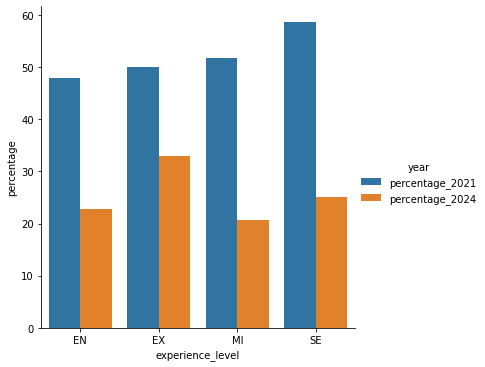

In [141]:
# plotting

melt_ans = pd.melt(ans, id_vars = 'experience_level', value_vars = ['percentage_2021', 'percentage_2024'], var_name = 'year',
                  value_name = 'percentage')

sns.catplot(kind = 'bar', data = melt_ans, x = 'experience_level', y = 'percentage', hue = 'year')

plt.show()

## Solution - 2

In [130]:
# Step 1: Filter data for 2021 and 2024
years = [2021, 2024]
filtered_df = df[df['work_year'].isin(years)]

# Step 2: Calculate the percentage of fully remote work for each experience level
total_counts = filtered_df.groupby(['work_year', 'experience_level'])['remote_ratio'].count().reset_index(name='total_count')
remote_counts = filtered_df[filtered_df['remote_ratio'] == 100].groupby(['work_year', 'experience_level'])['remote_ratio'].count().reset_index(name='remote_count')

# Merge the two DataFrames to get total counts and fully remote counts together
merged_counts = pd.merge(total_counts, remote_counts, on=['work_year', 'experience_level'], how='left')

# Step 3: Calculate the percentage of fully remote work
merged_counts['remote_percentage'] = (merged_counts['remote_count'] / merged_counts['total_count']) * 100

# Step 4: Pivot the DataFrame to compare 2021 and 2024 side by side
pivot_df = merged_counts.pivot(index='experience_level', columns='work_year', values='remote_percentage')

# Step 5: Calculate the difference between 2024 and 2021
pivot_df['percentage_change'] = (pivot_df[2024] - pivot_df[2021]) / pivot_df[2021] * 100

pivot_df

work_year,2021,2024,percentage_change
experience_level,,,
EN,47.826087,22.834646,-52.254832
EX,50.000000,33.018868,-33.962264
MI,51.724138,20.598911,-60.175439
SE,58.666667,25.156250,-57.120028


### 9. As a database analyst you have been assigned the task to select countries where average mid-level salary is higher than overall average mid-level salary for the year 2023.

In [16]:
mask = (df['experience_level'] == 'MI') & (df['work_year'] == 2023)
overall_avg_salary = df[mask]['salary_in_usd'].mean()

In [22]:
data = df[mask].groupby('company_location')['salary_in_usd'].mean().reset_index().rename(columns = {'salary_in_usd': 'avg_salary'})
data[data['avg_salary'] > overall_avg_salary]['company_location']

2     AU
4     CA
29    QA
32    SA
36    US
Name: company_location, dtype: object

### 10. As a database analyst you have been assigned the task to identify the company locations with the highest and lowest average salary for senior-level (SE) employees in 2023.

In [32]:
mask = (df['experience_level'] == 'SE') & (df['work_year'] == 2023)
data = df[mask].groupby('company_location')['salary_in_usd'].mean().reset_index().rename(columns = {'salary_in_usd': 'avg_salary'})
data.sort_values('avg_salary', inplace = True)
data.iloc[[0, -1], :]

,company_location,avg_salary
33,TR,18381.0
15,IL,266468.5
